In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("balanced_dataset.csv")

In [3]:
dataset

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
0,NIP,18,22,28,38,48,8000,1
1,NIP,14,41,24,34,44,4000,0
2,NIP,17,38,27,37,47,7000,0
3,NIP,15,97,25,35,45,5000,0
4,NIP,11,67,21,31,41,1000,0
...,...,...,...,...,...,...,...,...
1815,NIP,22,48,32,42,52,12000,1
1816,NIP,18,82,28,38,48,8000,1
1817,NIP,17,97,27,37,47,7000,0
1818,NIP,18,53,28,38,48,8000,1


## Replacing the null values

In [4]:
dataset.isnull().sum()

app_name         0
response_time    0
error_rate       0
cpu_usage        0
memory_usage     0
disk_space       0
active_users     0
downtime         0
dtype: int64

In [5]:
dataset['downtime'].value_counts()

downtime
0    1000
1     820
Name: count, dtype: int64

## Seprating the quan and qual 

In [6]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='object'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [7]:
quan,qual=quanQual(dataset)

In [8]:
quan

['response_time',
 'error_rate',
 'cpu_usage',
 'memory_usage',
 'disk_space',
 'active_users',
 'downtime']

In [9]:
qual

['app_name']

## Covariance

In [10]:
dataset[quan].cov()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
response_time,13.420686,2.957308,13.420686,13.420686,13.420686,1.342069e+04,-0.000942
error_rate,2.957308,854.709421,2.957308,2.957308,2.957308,2.957308e+03,0.010047
cpu_usage,13.420686,2.957308,13.420686,13.420686,13.420686,1.342069e+04,-0.000942
memory_usage,13.420686,2.957308,13.420686,13.420686,13.420686,1.342069e+04,-0.000942
disk_space,13.420686,2.957308,13.420686,13.420686,13.420686,1.342069e+04,-0.000942
active_users,13420.686405,2957.307783,13420.686405,13420.686405,13420.686405,1.342069e+07,-0.942433
downtime,-0.000942,0.010047,-0.000942,-0.000942,-0.000942,-9.424330e-01,0.247691


## Correlation

In [12]:
dataset[quan].corr()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
response_time,1.000000,0.027612,1.000000,1.000000,1.000000,1.000000,-0.000517
error_rate,0.027612,1.000000,0.027612,0.027612,0.027612,0.027612,0.000690
cpu_usage,1.000000,0.027612,1.000000,1.000000,1.000000,1.000000,-0.000517
memory_usage,1.000000,0.027612,1.000000,1.000000,1.000000,1.000000,-0.000517
disk_space,1.000000,0.027612,1.000000,1.000000,1.000000,1.000000,-0.000517
active_users,1.000000,0.027612,1.000000,1.000000,1.000000,1.000000,-0.000517
downtime,-0.000517,0.000690,-0.000517,-0.000517,-0.000517,-0.000517,1.000000


## Variance_inflation_factor(VIF)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [14]:
calc_vif(dataset[quan])

C:\Anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,response_time,inf
1,error_rate,1.000764
2,cpu_usage,inf
3,memory_usage,inf
4,disk_space,inf
5,active_users,inf
6,downtime,1.000001


In [15]:
calc_vif(dataset[['active_users','downtime']])

,variables,VIF
0,active_users,1.495559
1,downtime,1.495559


## Getting the values active_users=12000 that respect with downtime

In [16]:
dataset[dataset['active_users']==12000]['downtime']

9       1
19      1
32      0
41      1
54      1
       ..
1799    1
1801    1
1803    1
1804    1
1815    1
Name: downtime, Length: 191, dtype: int64

## Test the similarity between the downtime(1) and incident_duration(0) with respect to active_users at significance level of 5%.(Make decision using Hypothesis Testing)

In [17]:
#independent sample
#different group(0,1) but same condition(active_users)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
downtime_yes=dataset[dataset['downtime']==1]['active_users']
downtime_no=dataset[dataset['error_rate']==3]['active_users']
ttest_ind(downtime_yes,downtime_no)

TtestResult(statistic=0.41523566417294805, pvalue=0.6780755580313658, df=839.0)

## Test the similarity between the downtime(1) with respect to active_users and disk_spacep at significance level of 5. (Make decision using Hypothesis Testing)g)

In [18]:
#dependent sample
#same group(downtime) but different condition(active_users, disk_space)
from scipy.stats import ttest_rel
dataset=dataset.dropna()
downtime=dataset[dataset['downtime']==1]['active_users']
downtime1=dataset[dataset['downtime']==1]['disk_space']
ttest_ind(downtime,downtime1)

TtestResult(statistic=45.24901816759162, pvalue=9.70965744307506e-291, df=1638.0)

# ANOVA one way classification

In [19]:
import scipy.stats as stats
stats.f_oneway(dataset['active_users'],dataset['downtime'])

F_onewayResult(statistic=5069.021140864421, pvalue=0.0)

# The applications are down for next 3 months

In [20]:
down_apps=dataset[dataset['downtime']==1]
down_apps

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
0,NIP,18,22,28,38,48,8000,1
5,NIP,18,18,28,38,48,8000,1
8,NIP,14,98,24,34,44,4000,1
9,NIP,22,6,32,42,52,12000,1
13,NIP,10,45,20,30,40,0,1
...,...,...,...,...,...,...,...,...
1814,NIP,18,9,28,38,48,8000,1
1815,NIP,22,48,32,42,52,12000,1
1816,NIP,18,82,28,38,48,8000,1
1818,NIP,18,53,28,38,48,8000,1


## Normal distribution to Standard normal distribution

In [21]:
def stdNBgraph(dataset):
    # Normal Distribution is Converted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    
    values=[i for i in dataset]
    
    z_score=[((j-mean)/std) for j in values]
    
    sns.histplot(z_score,kde=True)
    
    sum(z_score)/len(z_score)
    #z_score.std()

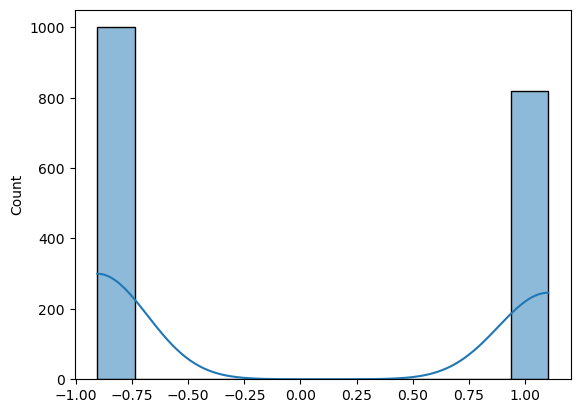

In [22]:
stdNBgraph(dataset['downtime'])

## Line plot

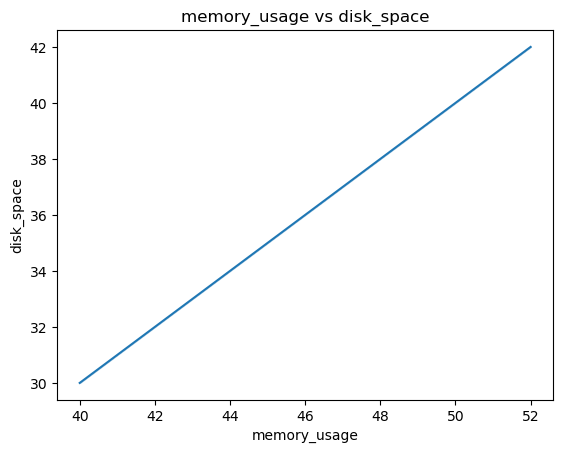

In [23]:
sns.lineplot(data=dataset, x='disk_space', y='memory_usage')
plt.title('memory_usage vs disk_space')
plt.xlabel('memory_usage')
plt.ylabel('disk_space')
plt.show()


## Box plot

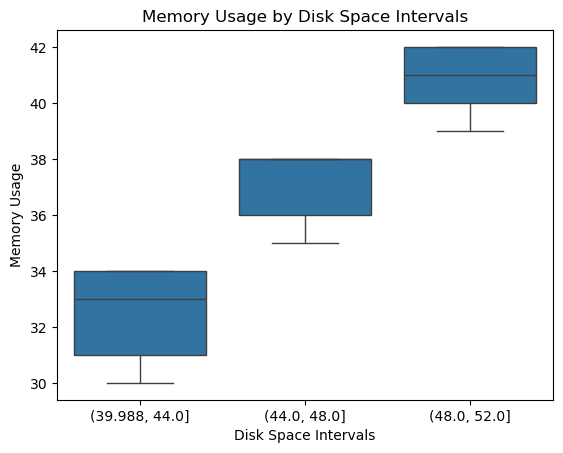

In [24]:
dataset['disk_space_bins'] = pd.cut(dataset['disk_space'], bins=3)  # Create bins for disk_space
sns.boxplot(data=dataset, x='disk_space_bins', y='memory_usage')
plt.title('Memory Usage by Disk Space Intervals')
plt.xlabel('Disk Space Intervals')
plt.ylabel('Memory Usage')
plt.show()


## Correlation Heatmap 

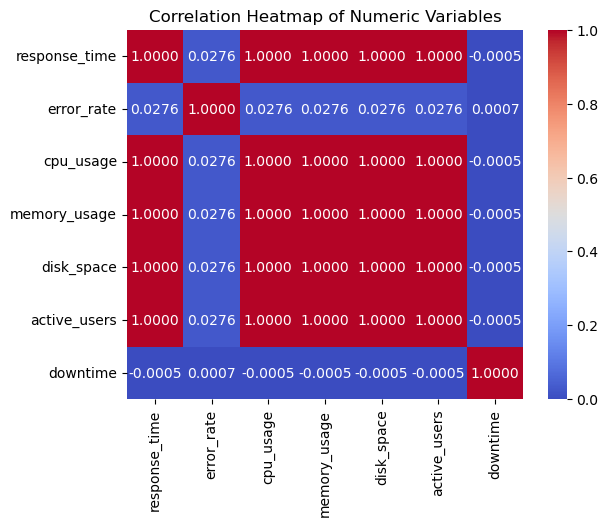

In [25]:
correlation_matrix = dataset[quan].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


## Scatter plot

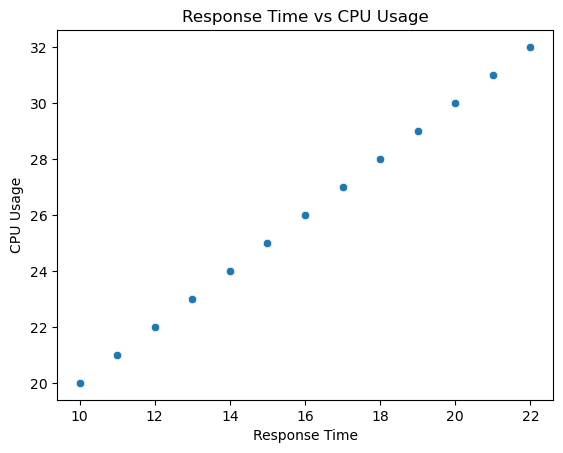

In [26]:
sns.scatterplot(data=dataset, x='response_time', y='cpu_usage')
plt.title('Response Time vs CPU Usage')
plt.xlabel('Response Time')
plt.ylabel('CPU Usage')
plt.show()


## seaborn

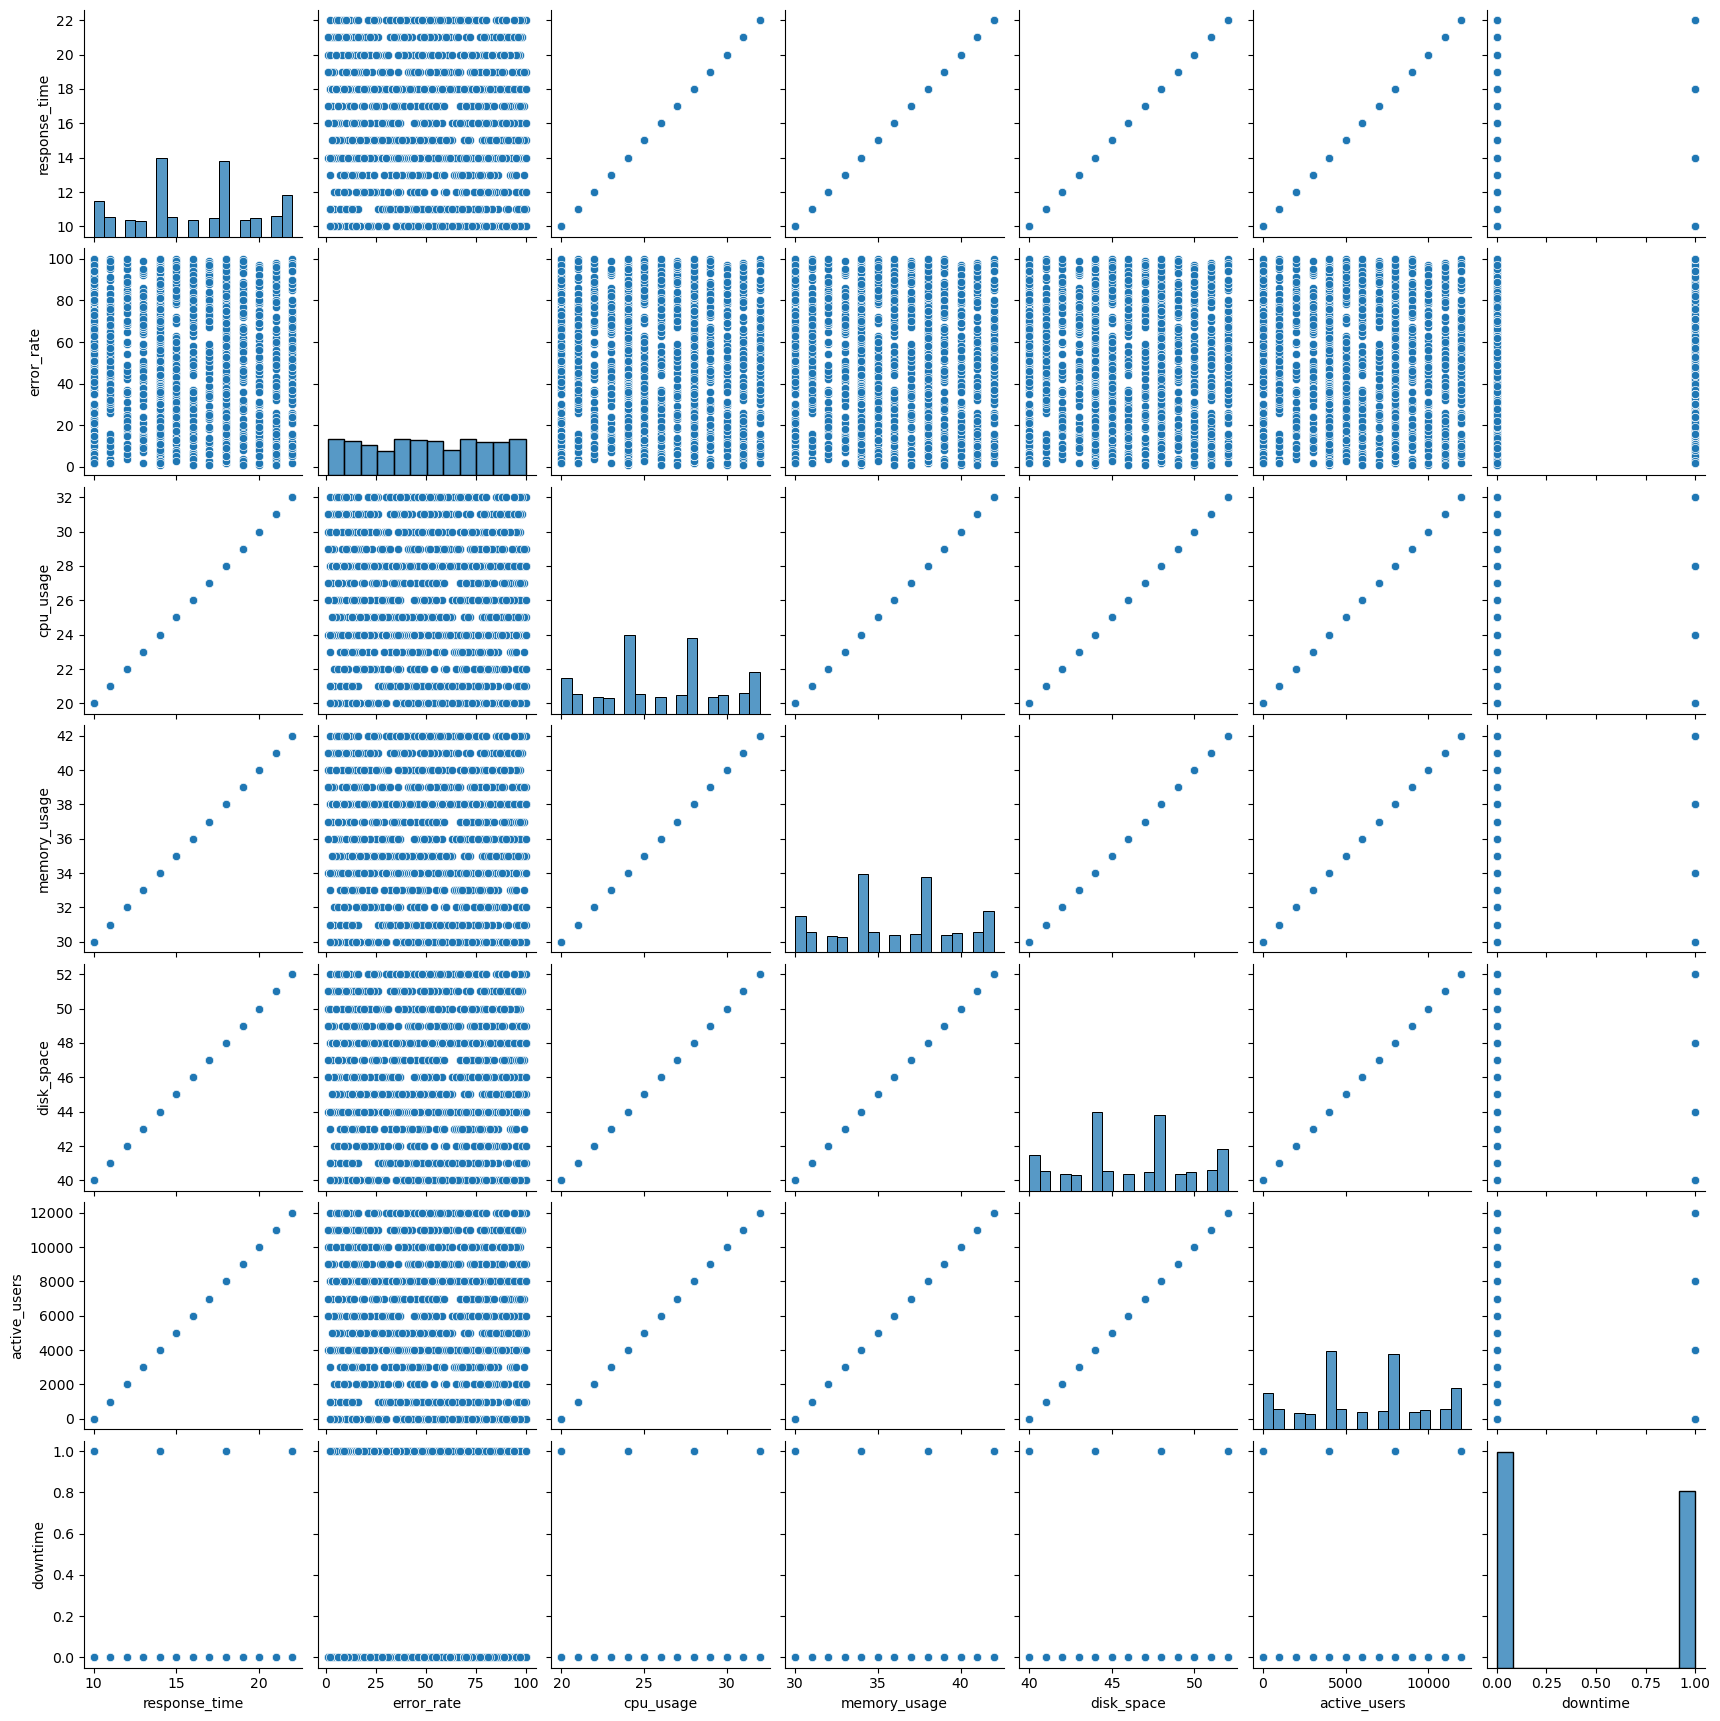

In [27]:
sns.pairplot(dataset[quan])